In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# 1)

In [52]:
boston = load_boston()

X = boston.data
y = boston.target


# 2)

In [41]:
# to make values vectors
u = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
print(u.shape, std.shape)

(13,) (13,)


# 3)

In [42]:
# Normalise
X = (X-u)/std
(pd.DataFrame(X[:5,:]).head(3))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727


# 4)

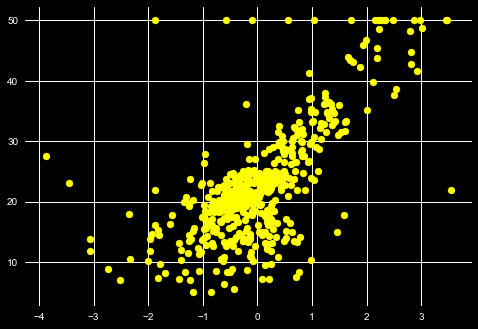

In [43]:
# plt Y vs any feature
plt.style.use('seaborn')
plt.style.use('dark_background')

plt.scatter(X[:,5], y, color = 'yellow')
plt.show()

# 5) 

In [44]:
X.shape, y.shape

((506, 13), (506,))

In [45]:
ones = np.ones((X.shape[0], 1))

X = np.hstack((ones, X))
X.shape

(506, 14)

In [46]:
X[:4, :4]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771]])

# 6)

In [47]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    error = 0.0
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y-y_)**2)
    
    return e/m

def gradent(X, y, theta):
    y_ = hypothesis(X, theta)
    grad = np.dot(X, T, (y_ - y))
    m = X.shape[0]
    
    return grad/m

def gradient_descent(X, y, learning_rate = 0.1, max_iters = 100):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X, y, theta)
        error_list.append(e)
        
        # gradient
        grad = gradient(X, y, theta)
        theta = theta - learning_rate*grad
        
    return theta, error_list

In [48]:
start = time.time()
theta, error_list = gradient_descent(X, y)
end = time.time()
print('Time taken by Vectorised code', end-start)

Time taken by Vectorised code 3.391859292984009


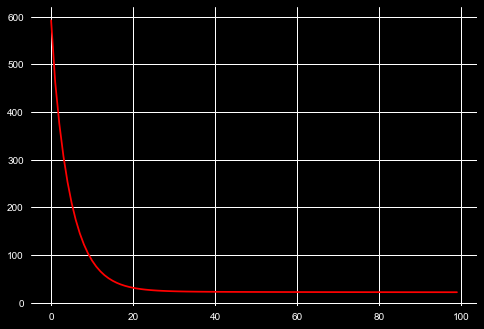

In [49]:
plt.plot(error_list, color = 'red')
plt.show()